In [19]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
#load the dataset
df=pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [3]:
#shape
df.shape

(3999, 12)

In [4]:
#columns
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
#statistical info
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [7]:
#checking missing/null values
df.isnull().sum()

,0
ID#,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0


In [8]:
# Remove outliers
from scipy import stats
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]

In [9]:
# Scale the features if required
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

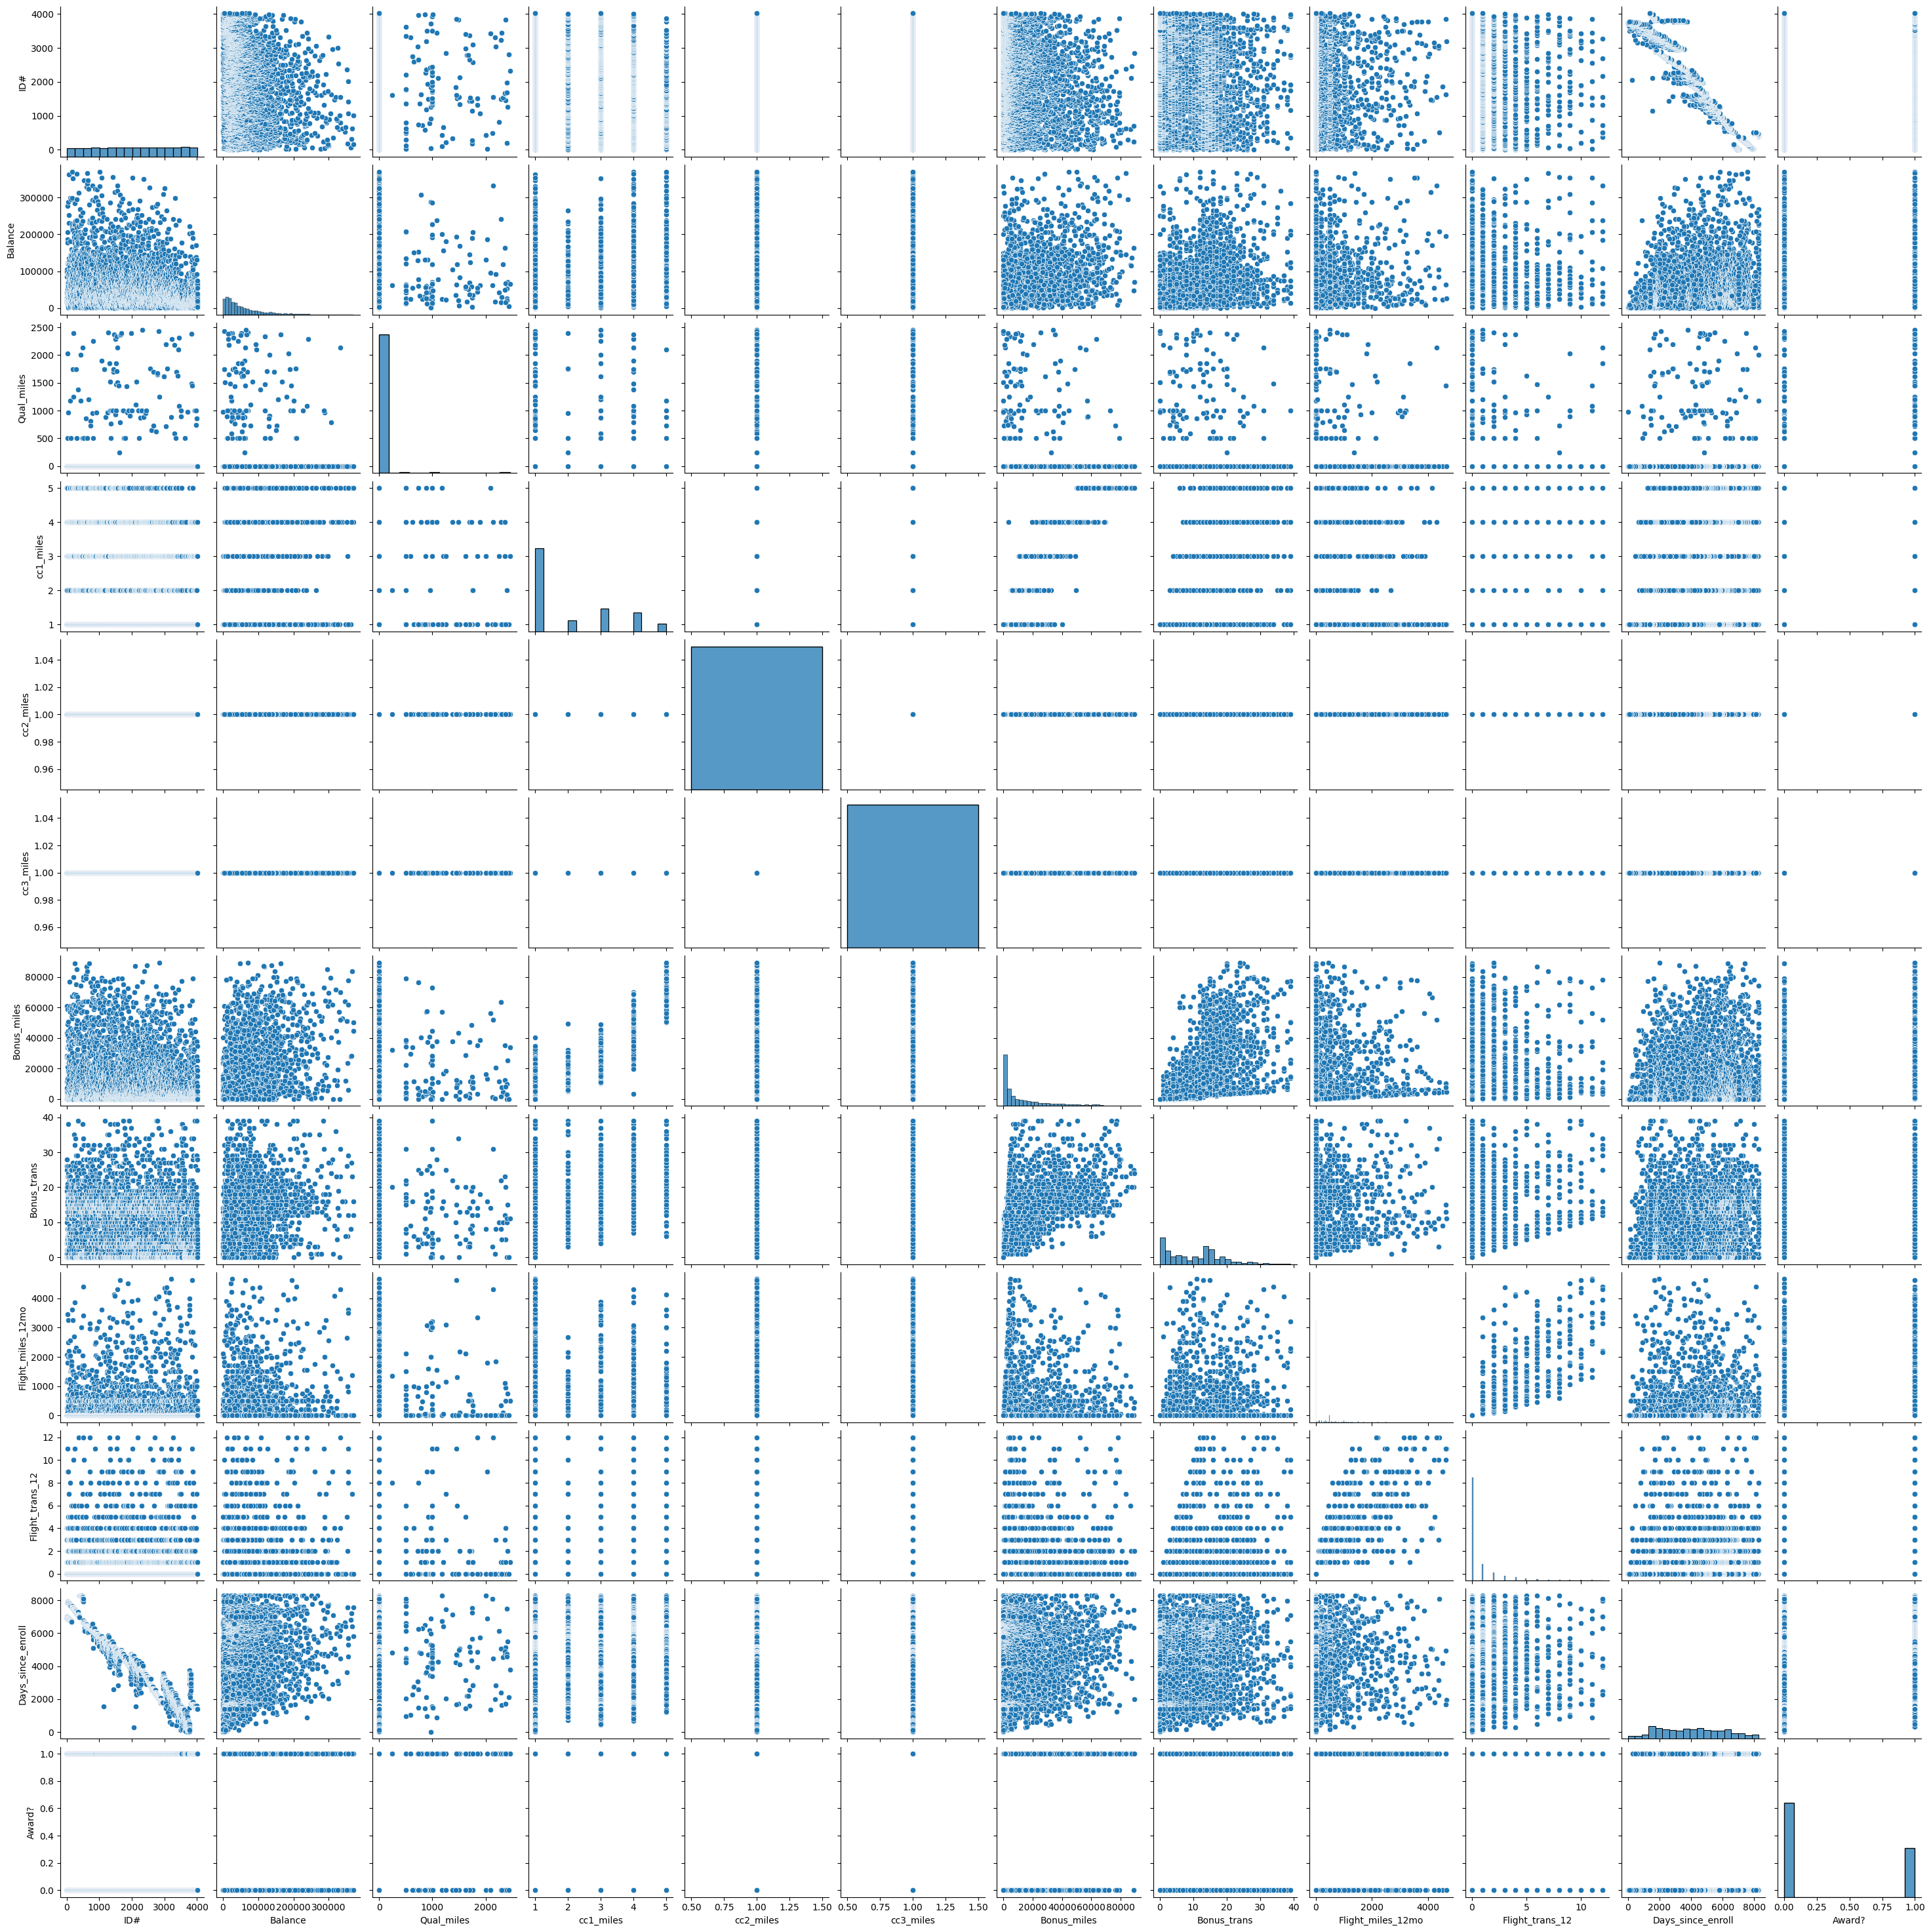

In [10]:
#pairplot
sns.pairplot(df)

**Implementing Clustering Algorithms**

**K-Means Clustering**

In [11]:
# K-Means
wcss = []  # Find optimal number of clusters using the Elbow method
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

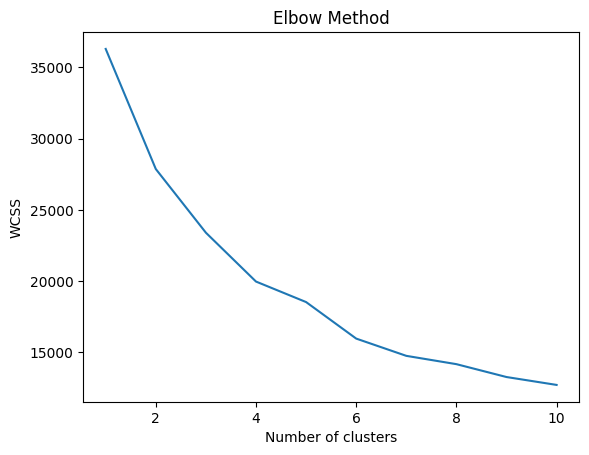

In [12]:
# Plot the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Based on the Elbow curve, we need to choose the optimal number of clusters and fit K-Means
optimal_k = 3  # Change this value based on the Elbow curve
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(scaled_data)
kmeans_labels = kmeans.labels_

**DBSCAN**

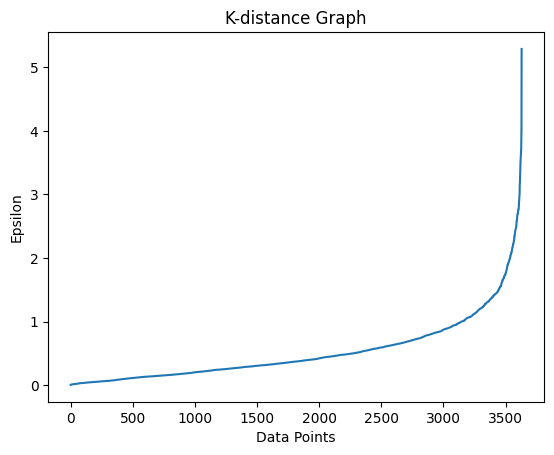

In [15]:
# Find optimal epsilon using NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
nn.fit(scaled_data)
distances, indices = nn.kneighbors(scaled_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.title('K-distance Graph')
plt.xlabel('Data Points')
plt.ylabel('Epsilon')
plt.show()

In [16]:
# Based on the K-distance graph, choose epsilon
epsilon = 0.5
dbscan = DBSCAN(eps=epsilon, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)
dbscan_labels

array([ 0,  0,  0, ..., -1, 24,  0])

**Hierarchical Clustering**

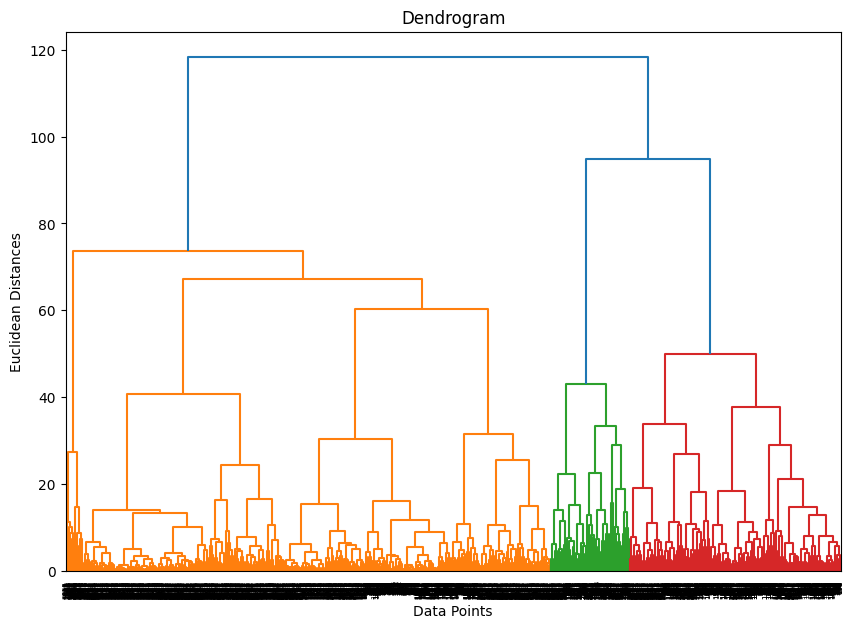

In [20]:
#Create a Dendrogram
plt.figure(figsize=(10, 7))
linked = linkage(scaled_data, method='ward')  # Ward minimizes variance within clusters

dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distances')
plt.show()

In [18]:
#Apply Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agglomerative_labels = cluster.fit_predict(scaled_data)

**Visualization**

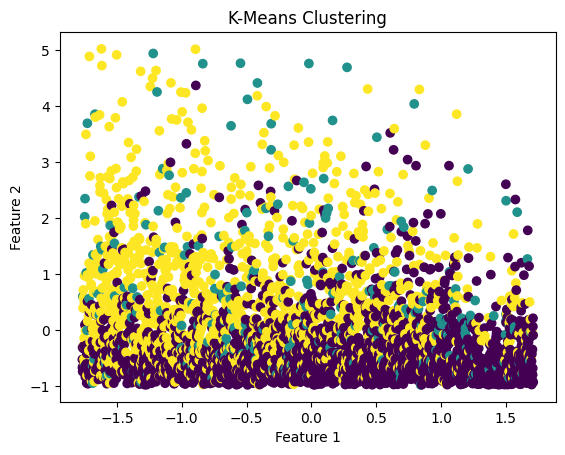

In [22]:
# Plot the clusters using scatter plot (k-means)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

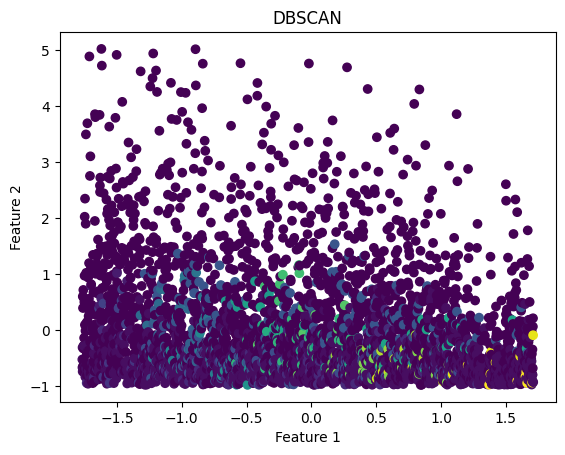

In [24]:
# Plot the clusters using scatter plot (DBSCAN)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

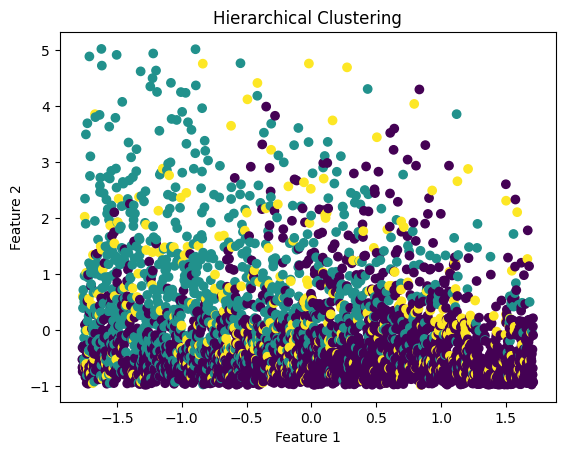

In [25]:
# Plot the clusters using scatter plot (hierarchical clustering)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**Evaluation and Performance Metrics**

In [26]:
# Silhouette score for K-Means
kmeans_silhouette_score = silhouette_score(scaled_data, kmeans_labels)
print("K-Means Silhouette Score:", kmeans_silhouette_score)

K-Means Silhouette Score: 0.29192710837860614


In [27]:
# Silhouette score for DBSCAN
dbscan_silhouette_score = silhouette_score(scaled_data, dbscan_labels)
print("DBSCAN Silhouette Score:", dbscan_silhouette_score)

DBSCAN Silhouette Score: -0.3994552312980999


In [28]:
# Silhouette score for Hierarchical Clustering
agglomerative_silhouette_score = silhouette_score(scaled_data, agglomerative_labels)
print("Hierarchical Clustering Silhouette Score:", agglomerative_silhouette_score)

Hierarchical Clustering Silhouette Score: 0.26359050526851413


In [29]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
for i, centroid in enumerate(cluster_centers):
    print(f"Cluster {i+1} centroid:", centroid)

Cluster 1 centroid: [2.33231236e+03 3.65085034e+04 2.72704058e+01 1.18467852e+00
 1.00000000e+00 1.00000000e+00 3.96015504e+03 6.15731874e+00
 9.63447332e+01 3.44277246e-01 3.52870816e+03 1.86958504e-01]
Cluster 2 centroid: [1.92642629e+03 9.71697371e+04 1.59533865e+02 2.01593625e+00
 1.00000000e+00 1.00000000e+00 1.90856494e+04 1.59243028e+01
 2.18692430e+03 6.19123506e+00 4.32283267e+03 6.25498008e-01]
Cluster 3 centroid: [1.53312732e+03 9.71607445e+04 3.69688027e+01 3.49578415e+00
 1.00000000e+00 1.00000000e+00 3.24038010e+04 1.72723440e+01
 1.42278246e+02 4.56155143e-01 4.99229511e+03 5.63237774e-01]
